In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [11]:
BASE_DIR = "classification_task"

# Parameters
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 100
SEED = 42
TEST_SPLIT = 0.30

if not os.path.isdir(BASE_DIR):
    raise FileNotFoundError(f"Dataset directory '{BASE_DIR}' not found! Put extracted dataset here.")
else:
    print(f"Dataset found at: {BASE_DIR}")


Dataset found at: classification_task


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=TEST_SPLIT
)

train_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=SEED
)

test_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=SEED
)

num_classes = train_generator.num_classes
print(f"\nClasses found: {train_generator.class_indices}")
print(f"Train samples: {train_generator.samples}, Test samples: {test_generator.samples}")


Found 4200 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.

Classes found: {'test': 0, 'train': 1}
Train samples: 4200, Test samples: 1800


In [4]:
def build_model(input_shape=(256,256,3), num_classes=2):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        # Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        # Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\srika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,649,346 (128.36 MB)

 Trainable params: 33,648,898 (128.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS
)

model.save("brisc_cnn_model.h5")
print("Model saved as brisc_cnn_model.h5")


C:\Users\srika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.7976 - loss: 2.8471 - val_accuracy: 0.8028 - val_loss: 6.7267
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8267 - loss: 0.6125 - val_accuracy: 0.8333 - val_loss: 5.5056
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8298 - loss: 0.5304 - val_accuracy: 0.8083 - val_loss: 1.0046
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8333 - loss: 0.5149 - val_accuracy: 0.8322 - val_loss: 0.4694
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8317 - loss: 0.5196 - val_accuracy: 0.8333 - val_loss: 0.4983
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.8331 - loss: 0.4846 - val_accuracy: 0.8339 - val_loss: 0.4752
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.8324 - loss: 0.4708 - val_accuracy: 0.8333 - val_loss: 0.4624
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.8333 - loss: 0.4601 - 

Model saved as brisc_cnn_model.h5


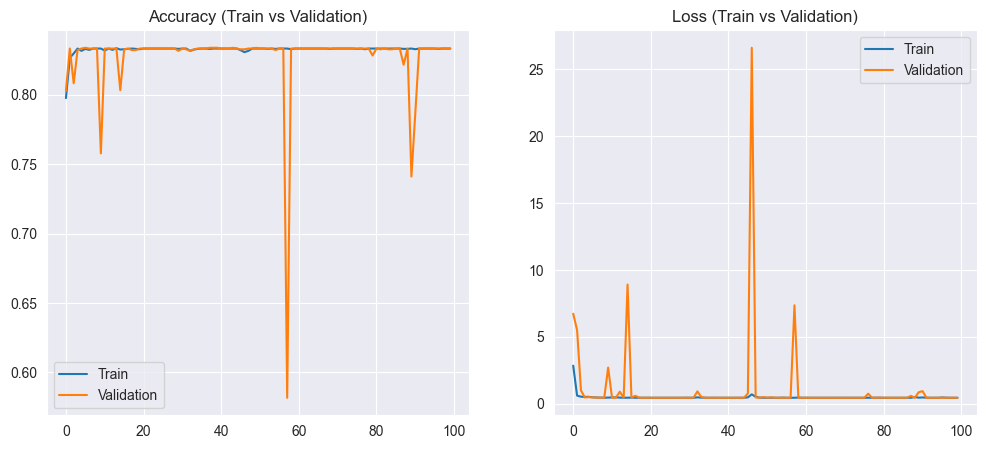

In [7]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy (Train vs Validation)')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss (Train vs Validation)')
plt.legend()

plt.show()


57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 532ms/step


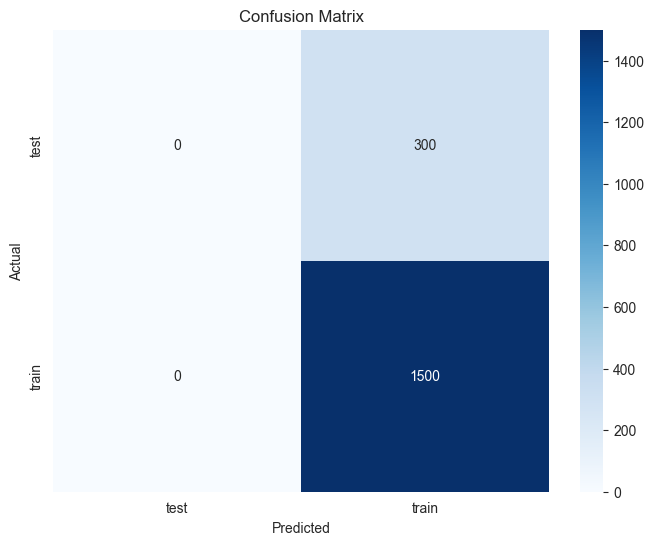

In [8]:
test_generator.reset()
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
class_names = list(test_generator.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")


Classification Report:

              precision    recall  f1-score   support

        test       0.00      0.00      0.00       300
       train       0.83      1.00      0.91      1500

    accuracy                           0.83      1800
   macro avg       0.42      0.50      0.45      1800
weighted avg       0.69      0.83      0.76      1800

Accuracy: 0.8333
Precision: 0.4167
Recall: 0.5000
F1-score: 0.4545


C:\Users\srika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\srika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\srika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_clas